# • DOMAIN: Botanical Research
# • CONTEXT: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.
# • DATA DESCRIPTION: The dataset comprises of images from 12 plant species.
# Source: https://www.kaggle.com/c/plant-seedlings-classification/data.
# • PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a photo.

# Steps and tasks:
# 1. Import and Understand the data
# A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.
Hint: You can extract it Manually by losing 2 marks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from IPython.display import SVG

from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Input, Add, Activation, GlobalMaxPooling2D
from keras.models import Sequential, Model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization

from keras.initializers import *

In [3]:
from zipfile import ZipFile

file_name = "plant-seedlings-classification.zip"

with ZipFile(file_name, 'r') as zip:
    
    zip.printdir()
    
    print('Extracting all the files now...')
    
    zip.extractall()
    
    print('Done!')

File Name                                             Modified             Size
plant-seedlings-classification/                2021-10-08 11:16:30            0
plant-seedlings-classification/.DS_Store       2021-10-08 11:16:36         6148
__MACOSX/plant-seedlings-classification/._.DS_Store 2021-10-08 11:16:36          120
plant-seedlings-classification/train/          2021-10-05 16:09:24            0
plant-seedlings-classification/train/Cleavers/ 2021-10-05 16:09:26            0
plant-seedlings-classification/train/.DS_Store 2021-10-06 16:30:12        10244
__MACOSX/plant-seedlings-classification/train/._.DS_Store 2021-10-06 16:30:12          120
plant-seedlings-classification/train/Sugar beet/ 2021-10-05 15:12:52            0
plant-seedlings-classification/train/Common Chickweed/ 2021-10-05 15:12:46            0
plant-seedlings-classification/train/Loose Silky-bent/ 2021-10-05 15:12:48            0
plant-seedlings-classification/train/Scentless Mayweed/ 2021-10-05 15:12:50           

# B. Map the images from train folder with train labels to form a DataFrame.
Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..

In [4]:
from glob import glob

import cv2

from sklearn.datasets import load_files

PATH = 'plant-seedlings-classification/train/*/*.png'

ALL_IMAGES = glob(PATH)

IMG_FOR_TRAIN = []

LABELS = []

NAMES = []

for i in ALL_IMAGES:
    IMG_FOR_TRAIN.append(cv2.resize(cv2.imread(i),(256,256)))
    LABELS.append(i.split('\\')[-2])
    NAMES.append(i.split('\\')[-1])
    
IMAGE_DATA = np.asarray(IMG_FOR_TRAIN)
IMAGE_LABELS = pd.DataFrame(LABELS)
IMAGE_NAMES = pd.DataFrame(NAMES)

In [5]:
IMAGE_LABELS.rename(columns={0:'SPECIES'},inplace=True)
IMAGE_NAMES.rename(columns={0:'NAME OF IMAGE'},inplace=True)

In [6]:
#IMAGE_DATA = np.asarray(IMG_FOR_TRAIN).astype('float32')/255

IMAGE_DF = IMAGE_LABELS.join(IMAGE_NAMES)

In [7]:
ALL_IMAGES_DF = pd.DataFrame(data = ALL_IMAGES, columns = ["IMAGES"])

IMAGE_DF = IMAGE_DF.join(ALL_IMAGES_DF)

In [8]:
print(IMAGE_DF.head())

       SPECIES  NAME OF IMAGE  \
0  Black-grass  0050f38b3.png   
1  Black-grass  0183fdf68.png   
2  Black-grass  0260cffa8.png   
3  Black-grass  05eedce4d.png   
4  Black-grass  075d004bc.png   

                                              IMAGES  
0  plant-seedlings-classification/train\Black-gra...  
1  plant-seedlings-classification/train\Black-gra...  
2  plant-seedlings-classification/train\Black-gra...  
3  plant-seedlings-classification/train\Black-gra...  
4  plant-seedlings-classification/train\Black-gra...  


# C. Write a function that will select n random images and display images along with its species.
Hint: If input for function is 5, it should print 5 random images along with its labels.

In [9]:
import random

def RANDOM_IMAGES(NUMBER):
    
    RAN_NUM = []
    IMG_ARRAY = []
    LABEL = []
    for i in range(NUMBER):
        RAN_NUM.append(random.randint(1, 4749))
        
    for j in RAN_NUM:
        IMG = IMAGE_DF['IMAGES'][j]
        LABEL.append(IMAGE_DF['SPECIES'][j])
        IMG_ARRAY.append(cv2.resize(cv2.imread(IMG),(256,256)))
    
    for k in range(len(RAN_NUM)):
        plt.figure(figsize = (7,5))
        plt.title(LABEL[k])
        plt.imshow(IMG_ARRAY[k])
        plt.show()
    
    return;

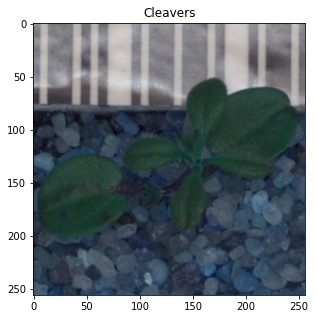

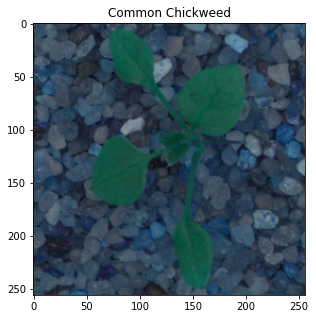

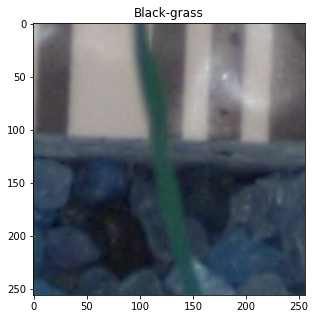

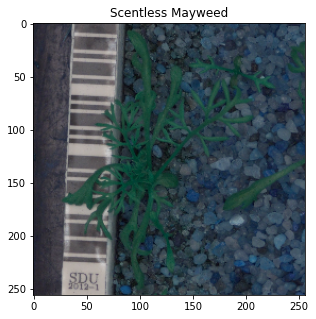

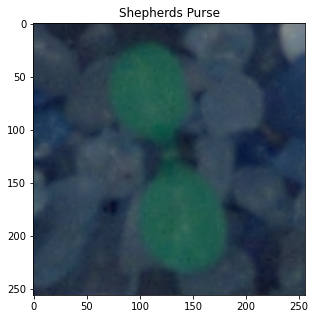

In [10]:
RANDOM_IMAGES(5)

# 2. Data preprocessing

# A. Create X & Y from the DataFrame.

In [11]:
X = []

Y = []

for i in IMAGE_DF['IMAGES']:
    X.append(cv2.resize(cv2.imread(i),(256,256)))
    Y.append((i.split('\\')[-2]))
    
X = np.asarray(X)

Y= pd.DataFrame(Y)

Y.rename(columns={0:'SPECIES'},inplace=True)

In [12]:
print(X[1])

print('\n\n',Y['SPECIES'].unique())

[[[ 38  44  55]
  [ 40  46  56]
  [ 43  49  60]
  ...
  [100 120 130]
  [100 118 131]
  [ 92 110 127]]

 [[ 43  49  56]
  [ 43  49  56]
  [ 45  50  59]
  ...
  [103 122 130]
  [ 96 116 127]
  [ 82 101 118]]

 [[ 40  47  54]
  [ 43  49  56]
  [ 49  55  62]
  ...
  [ 91 111 122]
  [ 82 102 115]
  [ 74  94 111]]

 ...

 [[ 34  49  85]
  [ 35  51  84]
  [ 31  50  80]
  ...
  [ 67  83  98]
  [ 63  79  94]
  [ 65  80  95]]

 [[ 29  50  84]
  [ 34  54  85]
  [ 31  52  81]
  ...
  [ 64  81  98]
  [ 61  77  95]
  [ 59  75  94]]

 [[ 29  52  85]
  [ 33  55  85]
  [ 36  56  85]
  ...
  [ 58  77  96]
  [ 57  75  95]
  [ 54  71  92]]]


 ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


# B. Encode labels of the images.

In [13]:
from sklearn.preprocessing import LabelEncoder

from keras.utils import np_utils

LAB_ENC = LabelEncoder()

LAB_ENC.fit(Y['SPECIES'])

Y_LAB_ENC = LAB_ENC.transform(Y['SPECIES'])

Y_ENC = np_utils.to_categorical(Y_LAB_ENC)

In [14]:
Y_ENC[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# C. Unify shape of all the images.

In [15]:
CLEAR_X_IMG = []

for img in X:
    
    X_BLURRED = cv2.GaussianBlur(img, (5,5),0)
    X_HSV = cv2.cvtColor(X_BLURRED, cv2.COLOR_BGR2HSV)

    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    MASK = cv2.inRange(X_HSV, lower_green, upper_green)
    KERNEL = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    MASK = cv2.morphologyEx(MASK,cv2.MORPH_CLOSE,KERNEL)

    CLEAR_X = np.zeros_like(img, np.uint8)
    CLEAR_X[MASK > 0] = img[MASK > 0]
    CLEAR_X_IMG.append(CLEAR_X)
    

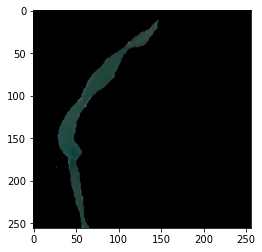

In [16]:
plt.imshow(CLEAR_X_IMG[1])

In [17]:
CLEAR_X_IMG = np.asarray(CLEAR_X_IMG)

CLEAR_X_IMG.shape

(4750, 256, 256, 3)

    * IN Q2.A, WHILE CREATING X AND Y, WE HAVE ALREADY RESHAPED IMAGES TO SIZE 256*256*3

# D. Normalise all the images.

In [18]:
CLEAR_X_IMG = CLEAR_X_IMG.astype('float32') / 255

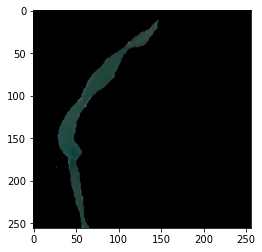

In [19]:
plt.imshow(CLEAR_X_IMG[1])

    * WE HAVE NORMALIZED ALL THE IMAGES BY CONVERTING THEM INTO FLOAT TYPE AND DIVIDED BY 255.

# 3. Model training
Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.
# A. Split the data into train and test data.

In [20]:
SEED = 38

random.seed(SEED)

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(CLEAR_X_IMG, Y_ENC, test_size = 0.2, random_state = SEED, stratify = Y_ENC)

In [21]:
print('COUNT AFTER SPLITTING THE DATA INTO TRAIN AND TEST:\n',
      '\nTRAINING SET COUNT:',len(Y_TRAIN),
      '\n\nTESTING SET COUNT:',len(Y_TEST))

COUNT AFTER SPLITTING THE DATA INTO TRAIN AND TEST:
 
TRAINING SET COUNT: 3800 

TESTING SET COUNT: 950


# B. Create new CNN architecture to train the model.

In [22]:
DATA_GENERATOR = ImageDataGenerator(rotation_range=180, zoom_range = 0.1, width_shift_range=0.1, 
                             height_shift_range=0.1, horizontal_flip=True, vertical_flip=True)  

DATA_GENERATOR.fit(X_TRAIN)

TRAIN_X_FLOW = DATA_GENERATOR.flow(X_TRAIN, Y_TRAIN, batch_size=8)

In [23]:
from keras.layers import MaxPool2D

from keras.optimizers import RMSprop

CV_MODEL = Sequential()

CV_MODEL.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
activation ='relu', batch_input_shape = (None,256, 256, 3)))


CV_MODEL.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
activation ='relu'))
CV_MODEL.add(MaxPool2D(pool_size=(2,2)))
CV_MODEL.add(Dropout(0.2))


CV_MODEL.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
activation ='relu'))
CV_MODEL.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
activation ='relu'))
CV_MODEL.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CV_MODEL.add(Dropout(0.3))

CV_MODEL.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
activation ='relu'))
CV_MODEL.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
activation ='relu'))
CV_MODEL.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CV_MODEL.add(Dropout(0.4))

CV_MODEL.add(GlobalMaxPooling2D())
CV_MODEL.add(Dense(256, activation = "relu"))
CV_MODEL.add(Dropout(0.5))
CV_MODEL.add(Dense(12, activation = "softmax"))

OPT = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

CV_MODEL.compile(optimizer = OPT, loss = 'categorical_crossentropy', metrics = ['accuracy'])
CV_MODEL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                        

# C. Train the model on train data and validate on test data.

In [24]:
CV_HISTORY = CV_MODEL.fit(TRAIN_X_FLOW, epochs = 10, validation_data=(X_TEST, Y_TEST),verbose = 1)

Epoch 1/10
475/475 [==============================] - 4993s 10s/step - loss: 2.4233 - accuracy: 0.1461 - val_loss: 2.2728 - val_accuracy: 0.2537
Epoch 2/10
475/475 [==============================] - 4871s 10s/step - loss: 2.0899 - accuracy: 0.2808 - val_loss: 1.9280 - val_accuracy: 0.3800
Epoch 3/10
475/475 [==============================] - 4200s 9s/step - loss: 1.7839 - accuracy: 0.3905 - val_loss: 1.7667 - val_accuracy: 0.3274
Epoch 4/10
475/475 [==============================] - 5375s 11s/step - loss: 1.5146 - accuracy: 0.4839 - val_loss: 1.4980 - val_accuracy: 0.4516
Epoch 5/10
475/475 [==============================] - 4760s 10s/step - loss: 1.3203 - accuracy: 0.5576 - val_loss: 1.2037 - val_accuracy: 0.6000
Epoch 6/10
475/475 [==============================] - 3656s 8s/step - loss: 1.2188 - accuracy: 0.5997 - val_loss: 1.1219 - val_accuracy: 0.6347
Epoch 7/10
475/475 [==============================] - 3731s 8s/step - loss: 1.1426 - accuracy: 0.6253 - val_loss: 1.0745 - val_accur

In [25]:
TRAIN_LOSS, TRAIN_ACCURACY = CV_MODEL.evaluate(X_TRAIN, Y_TRAIN, verbose=1)
TEST_LOSS, TEST_ACCURACY = CV_MODEL.evaluate(X_TEST, Y_TEST, verbose=1)

print('TRAIN LOSS:', TRAIN_LOSS)
print('TRAIN ACCURACY:', TRAIN_ACCURACY)

print('TEST LOSS:', TEST_LOSS)
print('TEST ACCURACY:', TEST_ACCURACY)

30/30 [==============================] - 181s 6s/step - loss: 0.8942 - accuracy: 0.7316
TRAIN LOSS: 0.8963568210601807
TRAIN ACCURACY: 0.7250000238418579
TEST LOSS: 0.8942018151283264
TEST ACCURACY: 0.7315789461135864


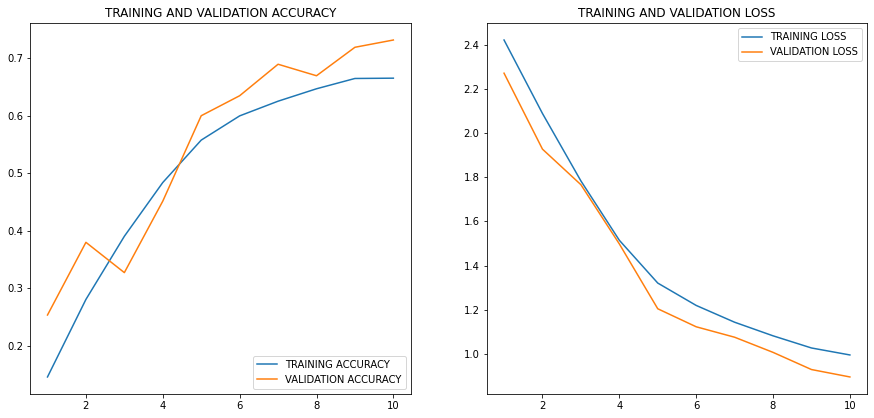

In [29]:
ACCURACY = CV_HISTORY.history['accuracy']
VAL_ACCURACY = CV_HISTORY.history['val_accuracy']
LOSS = CV_HISTORY.history['loss']
VAL_LOSS = CV_HISTORY.history['val_loss']
EPOCHS_RANGE = np.arange(1,11,1)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(EPOCHS_RANGE, ACCURACY, label='TRAINING ACCURACY')
plt.plot(EPOCHS_RANGE, VAL_ACCURACY, label='VALIDATION ACCURACY')
plt.legend(loc='lower right')
plt.title('TRAINING AND VALIDATION ACCURACY')

plt.subplot(2, 2, 2)
plt.plot(EPOCHS_RANGE, LOSS, label='TRAINING LOSS')
plt.plot(EPOCHS_RANGE, VAL_LOSS, label='VALIDATION LOSS')
plt.legend(loc='upper right')
plt.title('TRAINING AND VALIDATION LOSS')
plt.show()

# D. Select a random image and print actual label and predicted label for the same.

In [65]:
def PRED_IMAGES(NUMBER):
    
    RAN_NUM = []
    IMG_ARRAY = []
    LABEL = []
    for i in range(NUMBER):
        RAN_NUM.append(random.randint(1, 4749))
        
    for j in RAN_NUM:
        IMG = IMAGE_DF['IMAGES'][j]
        LABEL.append(IMAGE_DF['SPECIES'][j])
        IMG_ARRAY.append(cv2.resize(cv2.imread(IMG),(256,256)))
      
    return IMG_ARRAY, LABEL;

In [80]:
PRED_IMG, LABEL = PRED_IMAGES(1)

In [81]:
PRED_IMG = np.asarray(PRED_IMG)

PRED_IMG = PRED_IMG.astype('float')/255

In [82]:
PRED = CV_MODEL.predict(PRED_IMG)

PRED_CLASS = np.argmax(PRED, axis=1)

1/1 [==============================] - 0s 240ms/step


In [83]:
CLASS_NAMES = LAB_ENC.classes_

PRED_LABELS = LAB_ENC.classes_[PRED_CLASS]

print('IMAGE LABELS:\n',LABEL)

print('\n\nPREDICTED LABELS:\n',PRED_LABELS)

IMAGE LABELS:
 ['Fat Hen']


PREDICTED LABELS:
 ['Fat Hen']


    * WE HAVE TAKEN A RANDOM IMAGE FOR PREDICTION AND THE MODEL HAS PREDICTED IT CORRECTLY.

# • DOMAIN: Botanical Research
# • CONTEXT: University X is currently undergoing some research involving understanding the characteristics of flowers. They already have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.
# • DATA DESCRIPTION: The dataset comprises of images from 17 plant species.
# • PROJECT OBJECTIVE: To experiment with various approaches to train an image classifier to predict type of flower from the image.
# Steps and tasks:

# 1. Import and Understand the data
# A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading.
  Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.
  It can be loaded using: x, y = oxflower17.load_data()

In [2]:
import tflearn

import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
X, Y = oxflower17.load_data(one_hot=True)

# B. Print Number of images and shape of the images.

In [4]:
print('NUMBER OF IMAGES: ',len(X))

print('\nSHAPE OF IMAGES: ',X.shape)

NUMBER OF IMAGES:  1360

SHAPE OF IMAGES:  (1360, 224, 224, 3)


  * WE HAVE TOTAL OF 1360 IMAGES WITH SHAPE OF EACH IMAGE 224 X 224 X 3

# C. Print count of each class from y

In [5]:
def binatointeger(binary):
    index = 0
    for i in range(0,len(binary)):
        if binary[i] == 1:
            index = i+1
    return index

In [6]:
YY = []

for i in range(0,len(Y),1):
    NUM = binatointeger(Y[i])
    YY.append(NUM)

Y_ = pd.DataFrame(data = YY, columns = ["LABELS"])

In [7]:
Y_ = Y_.sort_values(by=['LABELS'])

Y_ = Y_.reset_index(drop=True)

print('COUNT OF EACH CLASS FROM Y:\n')
print(Y_['LABELS'].value_counts())

COUNT OF EACH CLASS FROM Y:

1     80
10    80
16    80
15    80
14    80
13    80
12    80
11    80
9     80
2     80
8     80
7     80
6     80
5     80
4     80
3     80
17    80
Name: LABELS, dtype: int64


  * WE HAVE TOTAL 17 CLASSES IN THE TARGET VARIABLE Y

  * EACH CLASS LABEL CONTAINS A COUNT OF 80 INDICATES THERE ARE 80 IMAGES OF 
  EACH CLASS.

# 2. Image Exploration & Transformation [Learning purpose - Not related to final model]
# A. Display 5 random images.

In [8]:
import random

def DISPLAY_RANDOM_IMAGES(NUMBER):
    
    RAN_NUM = []
    
    for i in range(NUMBER):
        RAN_NUM.append(random.randint(0, 1359))
        
    for j in RAN_NUM:
        plt.figure(figsize = (7,5))
        plt.imshow(X[j])
        plt.show()
    
    return;

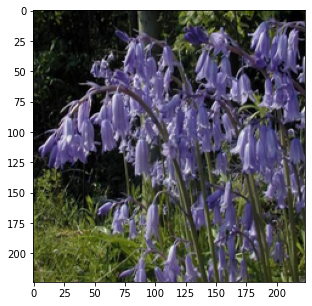

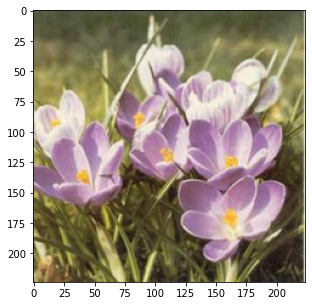

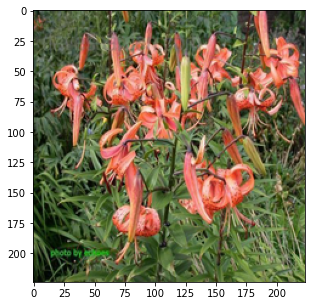

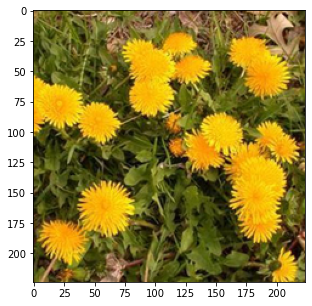

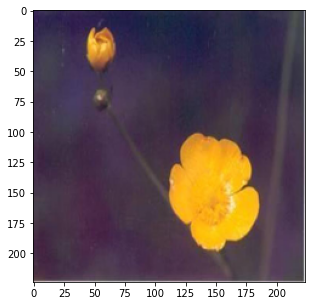

In [9]:
DISPLAY_RANDOM_IMAGES(5)

# B. Select any image from the dataset and assign it to a variable.

  X_VAR IS A VARIABLE WHERE WE WILL ASSIGN A RANDOM IMAGE FROM X

In [10]:
def GET_RANDOM_IMAGES(NUMBER,X):
    
    RAN_NUM = []
    X_VAR = []

    for i in range(NUMBER):
        RAN_NUM.append(random.randint(0, 1359))

    for j in RAN_NUM:
        X_VAR.append(X[j])

    return X_VAR;

In [11]:
X_VAR = []

X_VAR = GET_RANDOM_IMAGES(1,X)

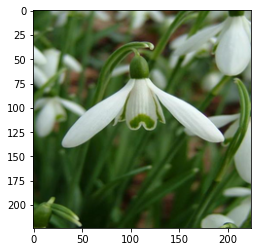

In [12]:
for i in range(0,len(X_VAR)):
    plt.imshow(X_VAR[i])

# C. Transform the image into grayscale format and display the same.

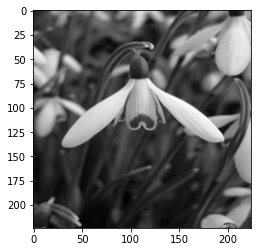

In [14]:
import cv2

#GREY_IMG = []

GRAY_IMG = cv2.cvtColor(X_VAR[0], cv2.COLOR_BGR2GRAY)
cv2.imshow('GRAY_SCALE', GRAY_IMG)

plt.imshow(GRAY_IMG, cmap='gray')

# D. Apply a filter to sharpen the image and display the image before and after sharpening.

IMAGE BEFORE SHARPENING:



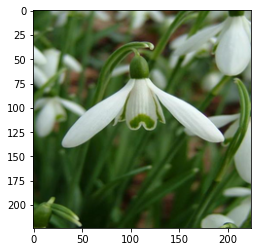

In [15]:
for i in range(0,len(X_VAR)):
    print('IMAGE BEFORE SHARPENING:\n')
    plt.imshow(X_VAR[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IMAGE AFTER SHARPENING:



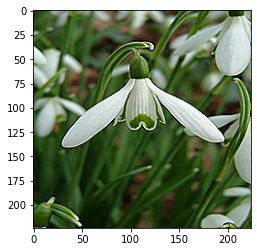

In [16]:
KERNEL = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for i in range(0,len(X_VAR)):
    SHARP_IMG = cv2.filter2D(src=X_VAR[i], ddepth=-1, kernel=KERNEL)
    print('IMAGE AFTER SHARPENING:\n')
    plt.imshow(SHARP_IMG)

# E. Apply a filter to blur the image and display the image before and after blur

IMAGE BEFORE BLURRING:



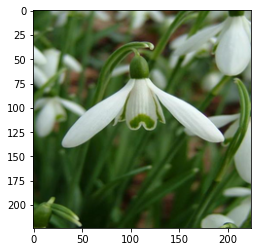

In [17]:
for i in range(0,len(X_VAR)):
    print('IMAGE BEFORE BLURRING:\n')
    plt.imshow(X_VAR[i])

IMAGE AFTER GAUSSIAN BLURRING:



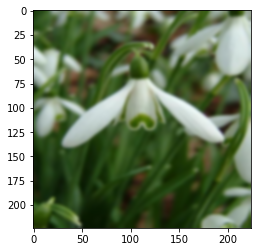

In [18]:
for i in range(0,len(X_VAR)):
    print('IMAGE AFTER GAUSSIAN BLURRING:\n')
    GAUS_BLUR = cv2.GaussianBlur(X_VAR[i], (7, 7), 0)
    plt.imshow(GAUS_BLUR)

IMAGE AFTER MEDIAN BLURRING:



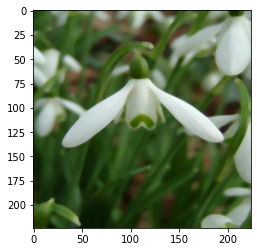

In [19]:
for i in range(0,len(X_VAR)):
    print('IMAGE AFTER MEDIAN BLURRING:\n')
    MED_BLUR = cv2.medianBlur(X_VAR[i], 5)
    plt.imshow(MED_BLUR)

IMAGE AFTER BILATERAL BLURRING:



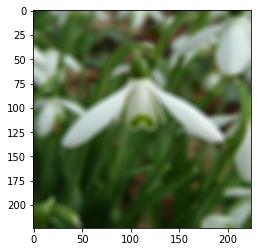

In [20]:
for i in range(0,len(X_VAR)):
    print('IMAGE AFTER BILATERAL BLURRING:\n')
    BIL_BLUR = cv2.bilateralFilter(X_VAR[i], 8, 80, 80)
    plt.imshow(BIL_BLUR)

# F. Display all the 4 images from above questions besides each other to observe the difference.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


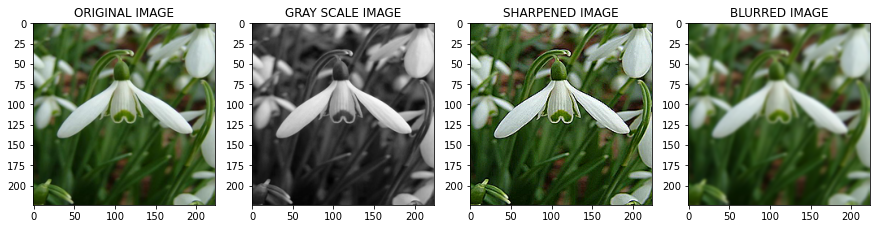

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(15, 15))

axs[0].set_title('ORIGINAL IMAGE')
axs[1].set_title('GRAY SCALE IMAGE')
axs[2].set_title('SHARPENED IMAGE')
axs[3].set_title('BLURRED IMAGE')

axs[0].imshow(X_VAR[0])
axs[1].imshow(GRAY_IMG, cmap='gray')
axs[2].imshow(SHARP_IMG)
axs[3].imshow(GAUS_BLUR)

# 3. Model training and Tuning:
# A. Split the data into train and test with 80:20 proportion.

In [22]:
SEED = 38

random.seed(SEED)

X = X.astype('float32') / 255

X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size = 0.2, random_state = SEED, stratify = Y)

# B. Train a model using any Supervised Learning algorithm and share performance metrics on test data.

In [23]:
# CONVERT THE 4-D ARRAY INTO 2-D ARRAY FOR TRAINING DATA

N_SAMPLES, N_X, N_Y, N_RGB = X_TRAIN.shape

X_TRAIN_2D = X_TRAIN.reshape(N_SAMPLES,N_X*N_Y*N_RGB)

Y_TRAIN_2D = []

for i in range(0,len(Y_TRAIN),1):
    NUM = binatointeger(Y_TRAIN[i])
    Y_TRAIN_2D.append(NUM)

In [24]:
# CONVERT THE 4-D ARRAY INTO 2-D ARRAY FOR TESTING DATA

N_SAMPLES, N_X, N_Y, N_RGB = X_TEST.shape

X_TEST_2D = X_TEST.reshape(N_SAMPLES,N_X*N_Y*N_RGB)

Y_TEST_2D = []

for i in range(0,len(Y_TEST),1):
    NUM = binatointeger(Y_TEST[i])
    Y_TEST_2D.append(NUM)

In [25]:
from sklearn.ensemble import RandomForestClassifier

SL_MODEL = RandomForestClassifier()

SL_MODEL.fit(X_TRAIN_2D, Y_TRAIN_2D)

RandomForestClassifier()

In [26]:
Y_PRED = SL_MODEL.predict(X_TEST_2D)

print(Y_PRED)

[ 2 12 17 13  9  1  3 12  4  3  5 16  9 14 12 10 16  1  5  3  8  4  1  6
 15 13 14 11  3  1 16 10  2  6  3 10 12 10  5 17  5  2 14  2  6 13  6 13
 16 12 13  9 15 13  2  2 14  9 11  5 10 17 11 17  3 11  5  6 16  4 17 12
 11 12  4  2  1 10 16  6 11  9  7  8  6  9  1  7  1  5  9  1  7  7  9  5
 16  7 12 15  8  8 15  4 17  9 16  7 12 15  5 15  9  7  8 13 16 13  6  5
  3 16  9  5 11 15 15  2 17 10  4  6 10 11  3  5  5  8  2  2  5  8  8 14
  3 11 11 12 17 16 13  1 17  3 10  6  8 16 15  4  9  8  4 17  8  3  3 15
  6 11 11 11  5 11 17 13  3  3 10  7 16  8  1  4  6 11  6  6  5  6 14 10
  4 13  9 15  7 17  7  5 13  9 17 13 13 10  3 16  6  1  2 15 11 10  6  9
  1 11  2  7  4 11  9 13  9 17  5 11 16 17 17 13  6 12 10  6 17 10 15  4
 16 16  6  6 13 16  7 16  8  2 11  1  9 13 17  8  5  7  8 14  2  8  9 13
 13  2 10 15  5 15  1 15]


In [28]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

ACCURACY = accuracy_score(Y_PRED, Y_TEST_2D)

print('ACCURACY SCORE USING RANDOM FOREST CLASSIFIER: ',ACCURACY)

print('\n\n',classification_report(Y_PRED, Y_TEST_2D))

ACCURACY SCORE USING RANDOM FOREST CLASSIFIER:  0.5220588235294118


               precision    recall  f1-score   support

           1       0.38      0.43      0.40        14
           2       0.44      0.47      0.45        15
           3       0.81      0.87      0.84        15
           4       0.44      0.58      0.50        12
           5       0.75      0.60      0.67        20
           6       0.25      0.19      0.22        21
           7       0.38      0.46      0.41        13
           8       0.69      0.69      0.69        16
           9       0.75      0.63      0.69        19
          10       0.31      0.31      0.31        16
          11       0.69      0.55      0.61        20
          12       0.31      0.45      0.37        11
          13       0.62      0.50      0.56        20
          14       0.38      0.86      0.52         7
          15       0.31      0.31      0.31        16
          16       0.44      0.37      0.40        19
          1

# RANDOM FOREST CLASSIFIER HAS 52% OF ACCURACY.

In [29]:
from sklearn.metrics import confusion_matrix

print('CONFUSION MATRIX \n\n',confusion_matrix(Y_PRED,Y_TEST_2D))

CONFUSION MATRIX 

 [[ 6  0  0  1  0  1  2  0  0  0  0  0  0  1  3  0  0]
 [ 0  7  2  0  0  0  0  0  1  2  0  2  1  0  0  0  0]
 [ 1  0 13  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 2  0  0  7  0  0  0  0  0  0  0  0  2  0  0  0  1]
 [ 1  0  0  3 12  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  1  1  4  1  0  0  2  1  0  0  2  5  1  0]
 [ 2  0  0  1  2  0  6  0  0  1  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  1  0 11  2  1  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  1 12  1  0  0  0  1  0  2  0]
 [ 1  0  0  0  0  2  1  1  0  5  3  0  0  1  2  0  0]
 [ 0  3  0  0  0  0  0  0  0  1 11  1  1  0  0  3  0]
 [ 0  1  0  0  0  0  0  0  0  1  1  5  1  0  1  1  0]
 [ 0  1  0  0  0  0  0  3  0  1  0  3 10  1  0  1  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  1  1  5  2  0  0  0  0  0  0  1  5  1  0]
 [ 0  1  0  0  0  2  0  0  1  1  0  4  0  3  0  7  0]
 [ 1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0 15]]


# C. Train a model using Neural Network and share performance metrics on test data.

In [30]:
X_TRAIN.shape, Y_TRAIN.shape

((1088, 224, 224, 3), (1088, 17))

In [34]:
from tensorflow.keras.layers import InputLayer

NN_MODEL = Sequential()

NN_MODEL.add(InputLayer(input_shape=(224, 224, 3)))

NN_MODEL.add(Flatten())
NN_MODEL.add(BatchNormalization())
NN_MODEL.add(Dense(1024, activation='relu'))
NN_MODEL.add(Dropout(0.2))

NN_MODEL.add(BatchNormalization())
NN_MODEL.add(Dense(512, activation='relu'))
NN_MODEL.add(Dropout(0.2))

NN_MODEL.add(BatchNormalization())
NN_MODEL.add(Dense(256, activation='relu'))
NN_MODEL.add(Dropout(0.2))

NN_MODEL.add(BatchNormalization())
NN_MODEL.add(Dense(17, activation = "softmax"))

NN_MODEL.compile(optimizer = Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

NN_MODEL.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 batch_normalization_8 (Batc  (None, 150528)           602112    
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 1024)              154141696 
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_9 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 512)              

In [35]:
HISTORY = NN_MODEL.fit(X_TRAIN, Y_TRAIN, validation_data=(X_TEST,Y_TEST),batch_size = 272, epochs = 17, verbose = 1)

Train on 1088 samples, validate on 272 samples
Epoch 1/17
1088/1088 [==============================] - 44s 40ms/sample - loss: 3.5763 - acc: 0.0579 - val_loss: 2.8334 - val_acc: 0.0772
Epoch 2/17
1088/1088 [==============================] - 43s 40ms/sample - loss: 3.3208 - acc: 0.0983 - val_loss: 2.8339 - val_acc: 0.0662
Epoch 3/17
1088/1088 [==============================] - 45s 42ms/sample - loss: 3.0561 - acc: 0.1324 - val_loss: 2.8348 - val_acc: 0.0772
Epoch 4/17
1088/1088 [==============================] - 43s 39ms/sample - loss: 2.8407 - acc: 0.1719 - val_loss: 2.8361 - val_acc: 0.0515
Epoch 5/17
1088/1088 [==============================] - 44s 40ms/sample - loss: 2.7022 - acc: 0.1994 - val_loss: 2.8377 - val_acc: 0.0588
Epoch 6/17
1088/1088 [==============================] - 46s 42ms/sample - loss: 2.6029 - acc: 0.2059 - val_loss: 2.8394 - val_acc: 0.0588
Epoch 7/17
1088/1088 [==============================] - 43s 40ms/sample - loss: 2.5013 - acc: 0.2436 - val_loss: 2.8416 - val

In [36]:
from sklearn import metrics

MODEL_DF = pd.DataFrame.from_dict(HISTORY.history)

Y_PRED = NN_MODEL.predict(X_TEST)

print('MODEL SCORE: ', metrics.r2_score(Y_TEST,Y_PRED))

print('\n\n',MODEL_DF.sort_values('acc',ascending = False).head())

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


MODEL SCORE:  -0.004874309945255695


         loss       acc  val_loss   val_acc
15  1.766774  0.450368  2.869723  0.058824
16  1.722823  0.444853  2.873378  0.058824
14  1.815388  0.416360  2.866096  0.058824
12  1.939659  0.408088  2.858949  0.058824
13  1.925698  0.372243  2.862440  0.058824


# D. Train a model using a basic CNN and share performance metrics on test data.

In [38]:
from keras.layers import MaxPool2D

from keras.optimizers import RMSprop

CNN_MODEL = Sequential()

CNN_MODEL.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
activation ='relu', batch_input_shape = (None,224, 224, 3)))


CNN_MODEL.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
activation ='relu'))
CNN_MODEL.add(MaxPool2D(pool_size=(2,2)))
CNN_MODEL.add(Dropout(0.2))


CNN_MODEL.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
activation ='relu'))
CNN_MODEL.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
activation ='relu'))
CNN_MODEL.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CNN_MODEL.add(Dropout(0.3))

CNN_MODEL.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
activation ='relu'))
CNN_MODEL.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
activation ='relu'))
CNN_MODEL.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CNN_MODEL.add(Dropout(0.4))

CNN_MODEL.add(GlobalMaxPooling2D())
CNN_MODEL.add(Dense(256, activation = "relu"))
CNN_MODEL.add(Dropout(0.5))
CNN_MODEL.add(Dense(17, activation = "softmax"))

OPT = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
CNN_MODEL.compile(optimizer = OPT, loss = 'categorical_crossentropy', metrics = ['accuracy'])
CNN_MODEL.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      36928     
                                                      

In [39]:
CNN_HISTORY = CNN_MODEL.fit(X_TRAIN, Y_TRAIN, epochs = 20, validation_data = (X_TEST,Y_TEST), batch_size = 136)

Train on 1088 samples, validate on 272 samples
Epoch 1/20
1088/1088 [==============================] - ETA: 0s - loss: 2.8351 - acc: 0.0441  

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 782s 718ms/sample - loss: 2.8351 - acc: 0.0441 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 2/20
1088/1088 [==============================] - 783s 719ms/sample - loss: 2.8340 - acc: 0.0515 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 3/20
1088/1088 [==============================] - 779s 716ms/sample - loss: 2.8336 - acc: 0.0515 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 4/20
1088/1088 [==============================] - 775s 713ms/sample - loss: 2.8340 - acc: 0.0662 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 5/20
1088/1088 [==============================] - 778s 715ms/sample - loss: 2.8335 - acc: 0.0533 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 6/20
1088/1088 [==============================] - 772s 709ms/sample - loss: 2.8339 - acc: 0.0570 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 7/20
1088/1088 [==============================] - 780s 717ms/sample - loss: 2.8336 - acc: 0.0478 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 8/20
1088/1088 [=========

In [40]:
CNN_LOSS, CNN_ACCURACY = CNN_MODEL.evaluate(X_TEST, Y_TEST, verbose=1)
print('TEST LOSS:', CNN_LOSS)
print('TEST ACCURACY:', CNN_ACCURACY)

TEST LOSS: 2.833217775120455
TEST ACCURACY: 0.05882353


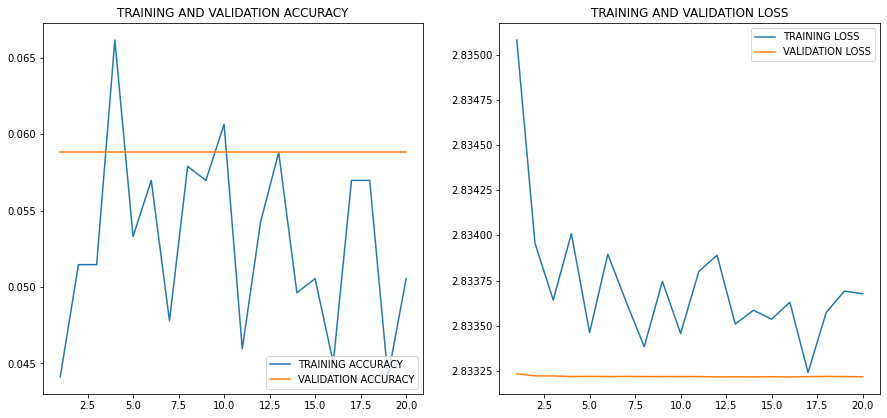

In [41]:
ACCURACY = CNN_HISTORY.history['acc']
VAL_ACCURACY = CNN_HISTORY.history['val_acc']
LOSS = CNN_HISTORY.history['loss']
VAL_LOSS = CNN_HISTORY.history['val_loss']
EPOCHS_RANGE = np.arange(1,21,1)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(EPOCHS_RANGE, ACCURACY, label='TRAINING ACCURACY')
plt.plot(EPOCHS_RANGE, VAL_ACCURACY, label='VALIDATION ACCURACY')
plt.legend(loc='lower right')
plt.title('TRAINING AND VALIDATION ACCURACY')

plt.subplot(2, 2, 2)
plt.plot(EPOCHS_RANGE, LOSS, label='TRAINING LOSS')
plt.plot(EPOCHS_RANGE, VAL_LOSS, label='VALIDATION LOSS')
plt.legend(loc='upper right')
plt.title('TRAINING AND VALIDATION LOSS')
plt.show()

# E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

In [42]:
file_name = "Prediction.jpg"

PRED_IMG = cv2.imread(file_name)

PRED_IMG = np.expand_dims(PRED_IMG, axis=0)

In [43]:
PREDICTION = (CNN_MODEL.predict(PRED_IMG)>0.5).astype("int32")

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [44]:
CLASS_PREDICTED = binatointeger(PREDICTION[0])

print('CLASS / LABEL OF THE INPUT PREDICT IMAGE: ', CLASS_PREDICTED)

CLASS / LABEL OF THE INPUT PREDICT IMAGE:  12


                        ****** END OF COMPUTER VISION ASSESSMENT SOLUTION ******